## Import Libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Store all the datasets ins a sorted format

In [2]:
datasets=sorted(glob.glob("data*.csv"))

In [3]:
datasets

['data-01.csv', 'data-02.csv', 'data-03.csv', 'data-04.csv']

## Visualize function

In [112]:
def visualize(dataset_name, subplots=True):
    
    #Use style named 'fivethirtyeight'
    plt.style.use('fivethirtyeight')
    
    #Read the dataset
    dataset = pd.read_csv(dataset_name)
    
    #Get averages, min, max of all columns
    avgs = dataset.mean(axis=0).to_list()
    maxs = dataset.max(axis=0).to_list()
    mins = dataset.min(axis=0).to_list()
    
    #Get features from 0 - 40 to plot on x-axis
    features = list(range(0, dataset.shape[1]))
    
    #Lengths of avgs, min, max and features needs to be the same
    assert(len(avgs)==len(features))
    
    #If plotting using the subplots
    if subplots==True:
        fig, axis = plt.subplots(nrows=1,ncols=3, figsize=(16,5))
        
        axis[0].plot(features, avgs)
        axis[1].plot(features, maxs)
        axis[2].plot(features, mins)
        
        
        axis[0].set_xlabel('Feature #')
        axis[0].set_ylabel('avg')
        
        axis[1].set_xlabel('Feature #')
        axis[1].set_ylabel('max')
        
        axis[2].set_xlabel('Feature #')
        axis[2].set_ylabel('min')
        
        fig.suptitle(dataset_name, fontsize=18)
        
    #If not plotting using the subplots. This will plot all the lines in one plot
    else:
        plt.figure(figsize=(10,7))
    
        plt.plot(features, avgs, label="avg")
        plt.plot(features, maxs, label="max")
        plt.plot(features, mins, label="min")
        
        plt.xlabel("Feature#")
        plt.ylabel("Values")
        plt.title(dataset_name)

        plt.legend()
    plt.show()

## Identifying issues

In [113]:
def identify_issues(dataset_name):
    df = pd.read_csv(dataset_name)
    if (df.iloc[:, 0].max() == 0 and df.iloc[:, 20].max() == 20):
        print("I doubt the integrity of this dataset")
    else:
        if sum(df.min(axis=0).to_list())==0:
            print("Why is this happening")
        else:
            print("Dataset looks good")
    

data-01.csv


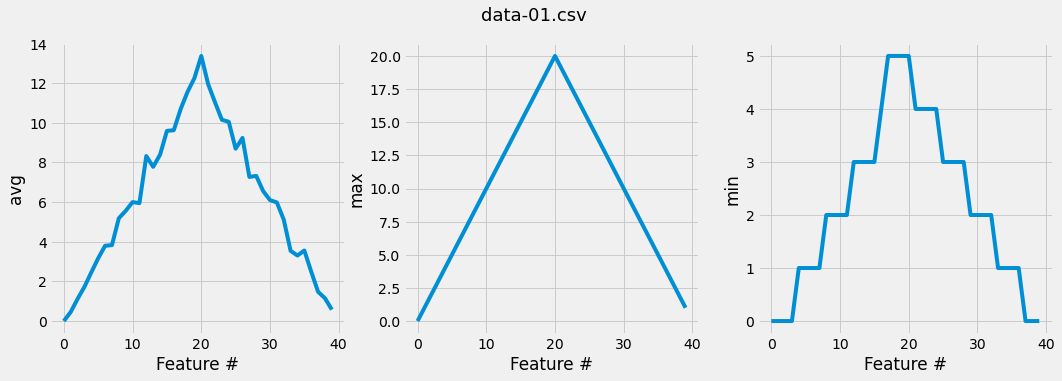

I doubt the integrity of this dataset
--------------------------------------------------

data-02.csv


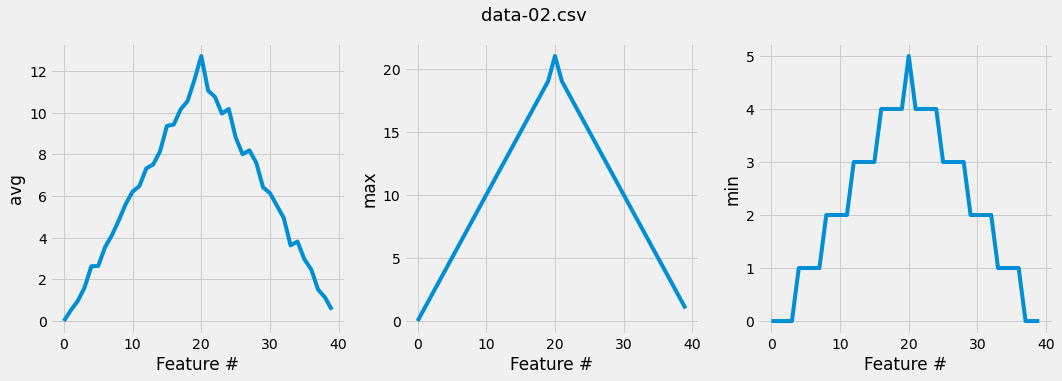

Dataset looks good
--------------------------------------------------

data-03.csv


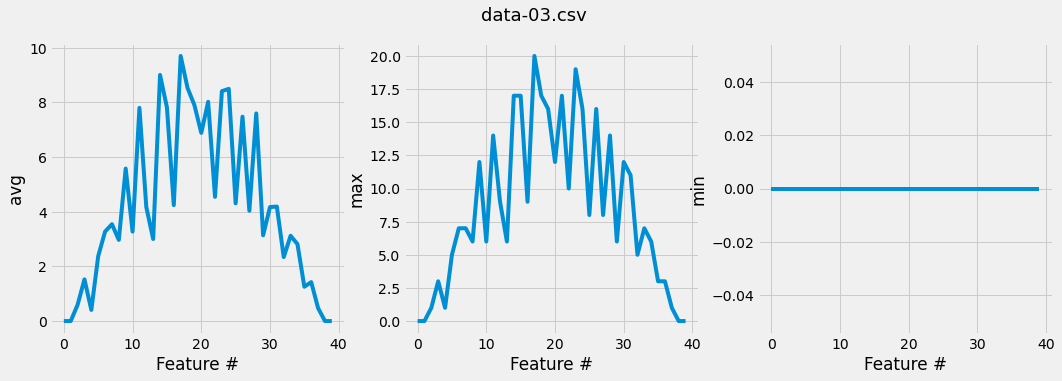

Why is this happening
--------------------------------------------------

data-04.csv


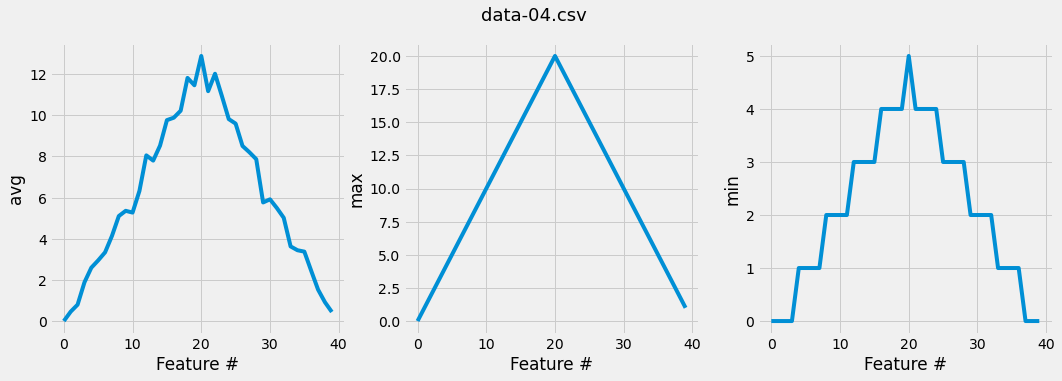

I doubt the integrity of this dataset
--------------------------------------------------



In [114]:
for dataset_name in datasets[:4]:
    print(dataset_name)
    visualize(dataset_name)
    identify_issues(dataset_name)
    print('--------------------------------------------------')
    print()